In [19]:
# Excercise Sheet 1
# By Luca Tittel, Filip Krzysztof Sabbo-Golebiowski and Sami Ghafari

In [82]:
# Includes and Tools

import numpy as nm
import matplotlib.pyplot as plot

from sklearn.datasets import load_digits
digits = load_digits()
from sklearn import model_selection

def check_errors(predicted_lables=[], true_targets=[]):
    assert len(predicted_lables)==len(true_targets)
    error_num=0
    for i in range(len(predicted_lables)):
        if (predicted_lables[i]==-1 and true_targets[i]==9) or (predicted_lables[i]==1 and true_targets[i]==3):
            error_num+=1
    return error_num

def check_errors_for_labels(predicted_lables=[], true_lables=[]):
    assert len(predicted_lables)==len(true_lables)
    error_num=0
    for i in range(len(predicted_lables)):
        if (predicted_lables[i] != true_lables[i]):
            error_num+=1
    return error_num

def filter_data(data=[], target=[], filter_arg=0):
    data_filtered_split=[]
    for instance in range(len(target)):
        if target[instance]==filter_arg:
            data_filtered_split.append(data[instance])
    return data_filtered_split

def filter_split_data_2d(data_2d=[], target=[], filter_arg=0, feature=0):
    data_2d_filtered_split=[]
    for instance in range(len(target)):
        if target[instance]==filter_arg:
            data_2d_filtered_split.append(data_2d[instance][feature])
    return data_2d_filtered_split

def change_targets_to_labels(targets=nm.array([])):
    labels=nm.array([])
    for target in targets:
        if target==3:
            labels = nm.append(labels, [-1])
        else:
            labels = nm.append(labels, [1])
    return labels

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


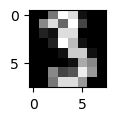

In [83]:
# Aufg 1-----------------------------------------------------------------------------------------------------------------------

#get data and print
print(digits.keys())
data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

img = images[3]
assert 2 == len(img.shape)
plot.figure(figsize=(1, 5))
plot.gray()
plot.imshow(img, interpolation = "nearest")
plot.show()

#filter only 3 and 9 onto data and target
def filter_TwoClasses(array = []):
    array_filt = [];
    for i in range(len(target)):
        if target[i]==3 or target[i]==9:
            array_filt.append(array[i])
    return array_filt;
data_filt = filter_TwoClasses(data)
target_filt = filter_TwoClasses(target)

#split and return list 0f training data and testing data and list of training targets and testing targets
#data_train_test[0] training data and data_train_test[1] test data and etc...
data_train_test = model_selection.train_test_split(data_filt, test_size=0.4, random_state=0)
target_train_test = model_selection.train_test_split(target_filt, test_size=0.4, random_state=0)


In [84]:
#Size of these images is 8x8

Look for pixles with biggest difference in avg:
[ 0.    0.28  1.43  1.29  1.44  0.85 -0.26 -0.01  0.    0.66 -0.08  0.
  0.93  0.25 -0.05 -0.03  0.   -0.94 -4.26 -1.12  1.84 -2.43 -1.04 -0.03
  0.   -0.84 -4.14 -1.37  0.71 -3.96 -1.94  0.    0.   -0.04 -0.64  0.46
  3.6  -0.09 -1.44  0.    0.    0.21  0.57  0.35  1.42  1.14  0.14  0.
  0.    0.21  0.86  0.9   1.6   1.48  0.14 -0.04  0.    0.23  1.76  1.55
  0.47 -0.28 -0.6  -0.03]
Error of handcrafted classifier: 0.0440771349862259


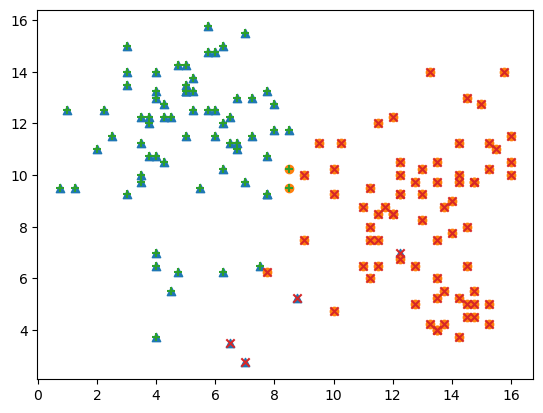

In [85]:
# Aufg 2--------------------------------------------------------------------------------------------------------------------

#used following code to find on average most different pixels
#then takes only them into account for 64D -> 2D conversion
def avg_data(data_train=[], filter_arg=0):
    avg = []
    for feature in range(len(data_train[0])):
        feature_sum = 0
        for instance in range(len(data_train)):
            if target_train_test[0][instance] == filter_arg:
                feature_sum += data_train[instance][feature]
        avg.append(feature_sum / len(data_train))
    return avg

def minus_arr(arr1=[], arr2=[]):
    assert len(arr1)==len(arr2)
    arr=[]
    for i in range(len(arr1)):
        arr.append(arr1[i]-arr2[i])
    return arr

average_data_3 = avg_data(data_train_test[0], 3)
average_data_9 = avg_data(data_train_test[0], 9)
diff = minus_arr(average_data_3,average_data_9)
print("Look for pixles with biggest difference in avg:")
print(nm.round(diff,2))


def features2d(data = []):
    data_2d = []
    for instance in range(len(data)):
        #extracted this linearcombination from the above procedure
        f_0 = (data[instance][18] + data[instance][21] + data[instance][26] + data[instance][29])/4 # 9 higher 3
        f_1 = (data[instance][52] + data[instance][53] + data[instance][58] + data[instance][59])/4
        feature_tupel = [f_0,f_1]
        data_2d.append(feature_tupel)
    return data_2d
    
# this global mu_custom is just for visualization later on
mu_custom = nm.zeros((2,2), float)
def nearest_mean(data_train=[], target_train=[], data_test=[]):
    assert len(data_train)==len(target_train)
    #calculate mean-vektors
    mean_3=[0.0,0.0]
    mean_9=[0.0,0.0]
    mean_3_counter = 0
    mean_9_counter=0
    for instance in range(len(data_train)):
        if target_train[instance]==3:
            mean_3[0]+=data_train[instance][0]
            mean_3[1]+=data_train[instance][1]
            mean_3_counter+=1
        if target_train[instance]==9:
            mean_9[0]+=data_train[instance][0]
            mean_9[1]+=data_train[instance][1]
            mean_9_counter+=1
    mean_3[0]=mean_3[0]/mean_3_counter
    mu_custom[0][0] = mean_3[0]
    mean_3[1]=mean_3[1]/mean_3_counter
    mu_custom[0][1] = mean_3[1]
    mean_9[0]=mean_9[0]/mean_9_counter
    mu_custom[1][0] = mean_9[0]
    mean_9[1]=mean_9[1]/mean_9_counter
    mu_custom[1][1] = mean_9[1]

    #check for nearest mean
    predicted_lables=[]
    for instance in data_test:
        dist_mean_3=(pow(instance[0]-mean_3[0], 2) + pow(instance[1]-mean_3[1], 2))
        dist_mean_9=(pow(instance[0]-mean_9[0], 2) + pow(instance[1]-mean_9[1], 2))
        if dist_mean_3 < dist_mean_9:
            predicted_lables.append(-1)
        else:
            predicted_lables.append(1)

    return predicted_lables

#call functions
data_2d = features2d(data_train_test[0])
data_2d_test = features2d(data_train_test[1])
#predictions for test
predicted_lables = nearest_mean(data_2d, target_train_test[0], data_2d_test)
#predictions for training set
predicted_lables_train = nearest_mean(data_2d, target_train_test[0], data_2d)

#scatterplot
#sort data for demonstration
data2d_3_f0 = filter_split_data_2d(data_2d_test, target_train_test[1], 3, 0)
data2d_3_f1 = filter_split_data_2d(data_2d_test, target_train_test[1], 3, 1)
data2d_9_f0 = filter_split_data_2d(data_2d_test, target_train_test[1], 9, 0)
data2d_9_f1 = filter_split_data_2d(data_2d_test, target_train_test[1], 9, 1)

data2d_3_f0_test = filter_split_data_2d(data_2d_test, predicted_lables, -1, 0)
data2d_3_f1_test = filter_split_data_2d(data_2d_test, predicted_lables, -1, 1)
data2d_9_f0_test = filter_split_data_2d(data_2d_test, predicted_lables, 1, 0)
data2d_9_f1_test = filter_split_data_2d(data_2d_test, predicted_lables, 1, 1)

#prints true labels
plot.scatter(data2d_3_f0, data2d_3_f1, marker='^')
plot.scatter(data2d_9_f0, data2d_9_f1, marker='o')

# prints handcrafted classifier labels
plot.scatter(data2d_3_f0_test, data2d_3_f1_test, marker='+')
plot.scatter(data2d_9_f0_test, data2d_9_f1_test, marker='x')
#misses of handcrafted classifier
error_test_custom = check_errors(predicted_lables, target_train_test[1])
error_train_custom = check_errors(predicted_lables_train, target_train_test[0])
print("Error of handcrafted classifier:", (error_test_custom+error_train_custom)/len(data_filt))

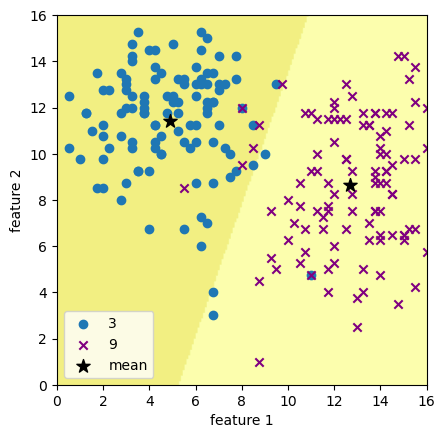

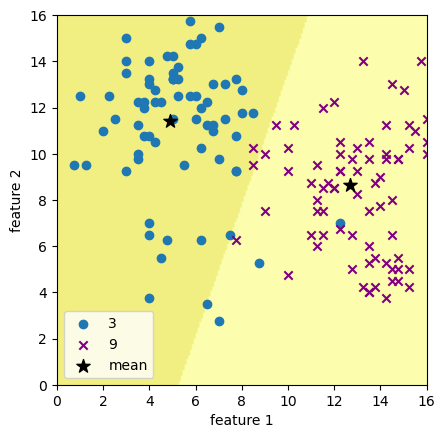

In [86]:
# Aufg 2.4 ----------------------------------------------------------------------------------------------------------------

def visualization(x_test = [], y_test = [], mean = []):
    
    #Grid
    x_min = [0, 0]
    x_max = [16, 16]
    x_mesh = nm.linspace(x_min[0], x_max[0], 200)
    y_mesh = nm.linspace(x_min[1], x_max[1], 200) 
    Mesh = nm.array(nm.meshgrid(x_mesh, y_mesh)).reshape(2, -1).T
    predicted_labels = nm.array(nearest_mean(data_2d, target_train_test[0], Mesh))
    plot.imshow(nm.flipud((predicted_labels>0).reshape(200, 200)), cmap="inferno", alpha=0.9, vmin=-20, extent=(x_min[0], x_max[0], x_min[1], x_max[1]))

    
    #Test points
    plot.scatter(x_test[y_test == -1, 0], x_test[y_test == -1, 1], marker = "o", label = "3")
    plot.scatter(x_test[y_test == 1, 0], x_test[y_test == 1, 1], c = "purple", marker = "x", label = "9")

    #Means
    plot.scatter(mean[0][0], mean[0][1], c = "black", marker = "*", s = 100, label = "mean")
    plot.scatter(mean[1][0], mean[1][1], c = "black", marker = "*", s = 100)
    
    #Plot
    plot.xlim(x_min[0], x_max[0])
    plot.ylim(x_min[1], x_max[1])
    plot.legend()
    plot.xlabel("feature 1")
    plot.ylabel("feature 2")
    plot.show()


training_labels = change_targets_to_labels(target_train_test[0])
test_labels = change_targets_to_labels(target_train_test[1])
#Visualization
visualization(nm.array(data_2d), nm.array(training_labels), mu_custom)
visualization(nm.array(data_2d_test), nm.array(test_labels), mu_custom)

Total Misses on Test: 2
Error of lda classifier: 0.008264462809917356


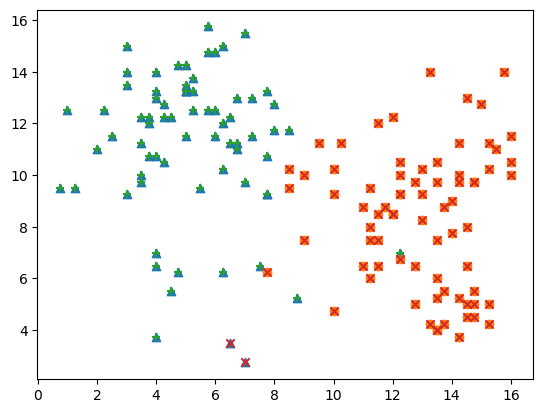

In [87]:
# Aufg 3--------------------------------------------------------------------------------------------------------------------

#0 is -1 i.e. 3
#1 is 1 i.e. 9

#filter features that are dead in training_features, these features have to be ignored in testing_features too
#even if they are not dead in testing_features
def filter_dead_features(training_features=nm.array([]), testing_features=nm.array([])):
    D=len(training_features[0])
    N=len(training_features)
    N_test=len(testing_features)

    #check for dead features, only remember alive feature indicees
    transposed_training = nm.transpose(training_features)
    transposed_test = nm.transpose(testing_features)
    alive_features = nm.array([], int)
    for feature in range(D):
        var = nm.var(transposed_training[feature])
        if var >= 0.001:
            alive_features = nm.append(alive_features, [feature])

    #save alive features in future output
    transposed_alive_training_features = nm.zeros((len(alive_features), N))
    transposed_alive_testing_features = nm.zeros((len(alive_features), N_test))
    for feature in range(len(alive_features)):
        transposed_alive_training_features[feature] = transposed_training[alive_features[feature]]
        transposed_alive_testing_features[feature] = transposed_test[alive_features[feature]]
        
    return nm.transpose(transposed_alive_training_features), nm.transpose(transposed_alive_testing_features)

#fit function, allways apply filter_dead_features beforehand, if not covar might not be invertable later on
def fit_lda(training_features=nm.array([]), training_labels=nm.array([])):
    #remember which features belong to 3 and which to 9
    training_features_0 = nm.array(filter_data(training_features, training_labels, -1))
    training_features_1 = nm.array(filter_data(training_features, training_labels, 1))
    
    N=len(training_features)
    N_i=nm.array((len(training_features_0), len(training_features_1)))
    D=len(training_features[0])

    #mean and prior calculating
    mu=nm.zeros((2,D), float)
    p=nm.zeros(2, float)
    for i in range(2):
        for feature in range(D):
            for instance in range(N_i[i]):
                if i==0:
                    mu[i][feature]+=training_features_0[instance][feature]
                else:
                    mu[i][feature]+=training_features_1[instance][feature]
            mu[i][feature]=mu[i][feature]/N_i[i]
        p[i]=N_i[i]/N
    
    #covar calculating
    covar=nm.zeros((D, D))
    for i in range(2):
        for instance in range(N_i[i]):
            if i==0:
                covar=nm.add(covar, nm.outer(nm.subtract(training_features_0[instance], mu[i]), nm.subtract(training_features_0[instance], mu[i])))
            else:
                covar=nm.add(covar, nm.outer(nm.subtract(training_features_1[instance], mu[i]), nm.subtract(training_features_1[instance], mu[i])))
    covar=nm.dot(covar, 1/N)
    
    return mu, covar, p


def predict_lda(mu, covar, p, test_features):
    M=len(test_features)

    #determine beta and b for calculations later on
    beta = nm.matmul(nm.linalg.inv(covar), nm.subtract(mu[1],mu[0]))
    b = nm.log(p[1]*(1/p[0]))
    b = b + (-1/2)*(nm.matmul(nm.add(mu[1], mu[0]), beta))

    #simply calculate euclidian product and make descision accordingly
    predicted_labels_lda=nm.zeros(M)
    for instance in range(M):
        descision = nm.matmul(beta, test_features[instance])
        descision += b
        if descision>=0:
            predicted_labels_lda[instance] = 1
        else:
            predicted_labels_lda[instance] = -1
            
    return predicted_labels_lda

#these are some clean data sets for future usage, no dead features and 3,9 has been convertet in -1,1
training_features, testing_features = filter_dead_features(data_train_test[0], data_train_test[1])
training_labels = change_targets_to_labels(target_train_test[0])
test_labels = change_targets_to_labels(target_train_test[1])

# function calls
mu, covar, p = fit_lda(training_features, training_labels)
predicted_lables_lda = predict_lda(mu, covar, p, testing_features)
predicted_lables_train_lda = predict_lda(mu, covar, p, training_features)

#Visuals
data2d_3_f0_test_lda = filter_split_data_2d(data_2d_test, predicted_lables_lda, -1, 0)
data2d_3_f1_test_lda = filter_split_data_2d(data_2d_test, predicted_lables_lda, -1, 1)
data2d_9_f0_test_lda = filter_split_data_2d(data_2d_test, predicted_lables_lda, 1, 0)
data2d_9_f1_test_lda = filter_split_data_2d(data_2d_test, predicted_lables_lda, 1, 1)
print("Total Misses on Test:", check_errors(predicted_lables_lda, target_train_test[1]))

#prints true labels
plot.scatter(data2d_3_f0, data2d_3_f1, marker='^')
plot.scatter(data2d_9_f0, data2d_9_f1, marker='o')

#prints lda labels
plot.scatter(data2d_3_f0_test_lda, data2d_3_f1_test_lda, marker='+')
plot.scatter(data2d_9_f0_test_lda, data2d_9_f1_test_lda, marker='x')

#error analysis
error_test_lda = check_errors_for_labels(predicted_lables_lda, test_labels)
error_train_lda = check_errors_for_labels(predicted_lables_train_lda, training_labels)
print("Error of lda classifier:", (error_test_lda+error_train_lda)/len(data_filt))



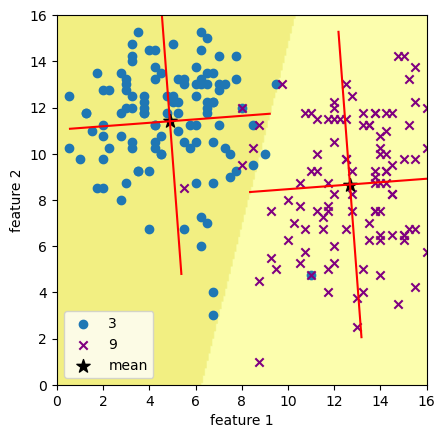

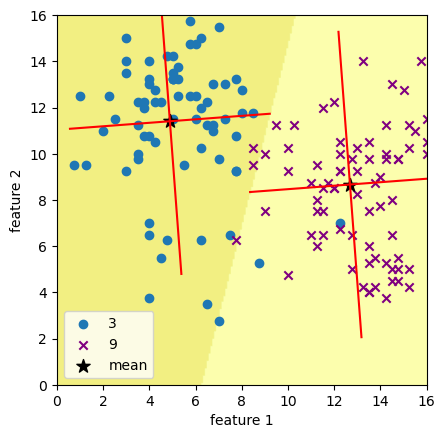

In [88]:
# Aufg 3.3 -------------------------------------------------------------------------------------------------------

def visualization_lda(x_test = [], y_test = [], mean = []):
    
    #eigenvectors
    covmat = fit_lda(nm.array(data_2d), nm.array(training_labels))[1]
    eigenvec_0 = nm.linalg.eig(covmat)[1][0]*nm.linalg.eig(covmat)[0][0]
    eigenvec_1 = nm.linalg.eig(covmat)[1][1]*nm.linalg.eig(covmat)[0][1]
    
    #Grid
    x_min = [0, 0]
    x_max = [16, 16]
    x_mesh = nm.linspace(x_min[0], x_max[0], 200)
    y_mesh = nm.linspace(x_min[1], x_max[1], 200) 
    Mesh = nm.array(nm.meshgrid(x_mesh, y_mesh)).reshape(2, -1).T
    predicted_labels = predict_lda(fit_lda(nm.array(data_2d), nm.array(training_labels))[0],covmat, fit_lda(nm.array(data_2d), nm.array(training_labels))[2], Mesh)
    plot.imshow(nm.flipud((predicted_labels>0).reshape(-1, 200)), cmap="inferno", alpha=0.9, vmin=-20, extent=(x_min[0], x_max[0], x_min[1], x_max[1]))
    
    
    #Test points
    plot.scatter(x_test[y_test == -1, 0], x_test[y_test == -1, 1], marker = "o", label = "3")
    plot.scatter(x_test[y_test == 1, 0], x_test[y_test == 1, 1], c = "purple", marker = "x", label = "9")

    #Means
    plot.scatter(mean[0][0], mean[0][1], c = "black", marker = "*", s = 100, label = "mean")
    plot.scatter(mean[1][0], mean[1][1], c = "black", marker = "*", s = 100)

    #Eigenvektors
    plot.plot((mean[0][0]+eigenvec_0[0], mean[0][0]-eigenvec_0[0]), (mean[0][1]+eigenvec_0[1], mean[0][1]-eigenvec_0[1]), c = "red")
    plot.plot((mean[0][0]+eigenvec_1[0], mean[0][0]-eigenvec_1[0]), (mean[0][1]+eigenvec_1[1], mean[0][1]-eigenvec_1[1]), c = "red")
    plot.plot((mean[1][0]+eigenvec_0[0], mean[1][0]-eigenvec_0[0]), (mean[1][1]+eigenvec_0[1], mean[1][1]-eigenvec_0[1]), c = "red")
    plot.plot((mean[1][0]+eigenvec_1[0], mean[1][0]-eigenvec_1[0]), (mean[1][1]+eigenvec_1[1], mean[1][1]-eigenvec_1[1]), c = "red")
    
    #Plot
    plot.xlim(x_min[0], x_max[0])
    plot.ylim(x_min[1], x_max[1])
    plot.legend()
    plot.xlabel("feature 1")
    plot.ylabel("feature 2")
    plot.show()


#Visualization
visualization_lda(nm.array(data_2d), nm.array(training_labels), mu_custom)
visualization_lda(nm.array(data_2d_test), nm.array(test_labels), mu_custom)

In [89]:
# Aufg 3.4 -------------------------------------------------------------------------------------------------------

# We tried cross validation
# def cross_val_lda(cross_val_features=nm.array([]), cross_val_labels=nm.array([]), folds=2):
#     folder = model_selection.KFold(folds)
#     splits = folder.split(cross_val_labels)

#     errors = nm.array([], float)
#     for i in range(folds):
#         (train_indices, test_indices) = next(splits)
#         # training_features_i, training_labels_i, testing_features_i, testing_labels_i =\
#         #         nm.array(len(train_indices), []), nm.array(len(train_indices)), nm.array(len(test_indices), []), nm.array(len(test_indices))

        
#         training_features_i = cross_val_features[train_indices]
        
    

# cross_val_features = data_filt
# cross_val_labels = change_targets_to_labels(target_filt)
# print(cross_val_lda(cross_val_features, cross_val_labels, 10))
# print (len(cross_val_features))


Total Misses on Test: 0
Error of smv classifier: 0.005509641873278237


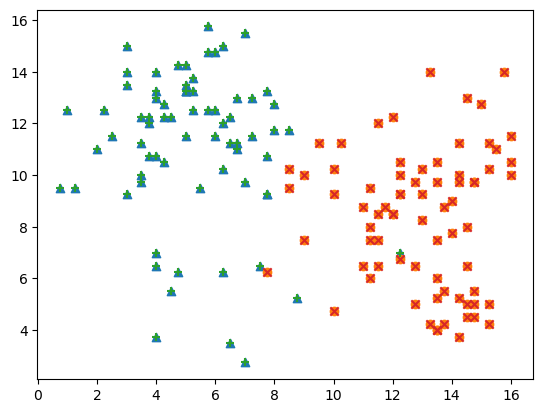

In [90]:
# Aufg 4-------------------------------------------------------------------------------------------------------------------------------------------

# predict smv is making descision respective to beta and b, needs to be called for training itterations
def predict_smv(beta = nm.array([]), b = nm.array([]), testing_features = nm.array([])):
    N = len(testing_features)
    D = len(testing_features[0])

    #simply evaluates scalar product and so on for descision rule for each instance
    predicted_lables = nm.zeros(N)
    for instance in range(N):
        evaluation = nm.matmul(testing_features[instance], beta)
        evaluation = evaluation + b
        if evaluation >=0:
            predicted_lables[instance] = 1
        else:
            predicted_lables[instance] = -1
    return predicted_lables


Loss_ = []
#fit_smv calls apon predict_smv multiple times for learnich itterations, it tries different beta,b combinations
def fit_smv(training_features, training_labels):
    D=len(training_features[0])
    N=len(training_features)
    hyp_param = 0.1
    #for learningrate 0.1 our numbers where jumpy, we were stuck changing between two bad beta,b combinations
    learn_rate = 0.005
    # for low itterations very bad outcome
    # error starts to lower steadyly after 300 itterations, after 500 it can be considered a fair guess, thow much worse than the others
    # 1000 already gives almost perfect results, we still used 10000 to be sure
    max_itterations = 10000

    # some memory for implementation of itteration formulars and runtime controle
    beta = nm.zeros(D, float)
    for i in range(len(beta)):
        beta[i]=nm.random.normal()
    beta_last = beta
    b = 0
    b_last = 0
    error = 0.0
    error_last = 0.0
    
    
    # in every itteration try to improve beta,b combination
    for i in range(max_itterations):
        beta_last = beta
        b_last = b
        error_last = error

        #make predictions and check if they are getting better
        #here we use the predict funtion
        predicted_labels = predict_smv(beta, b, training_features)
        error = check_errors_for_labels(predicted_labels, training_labels)
        error = error/N 

        #we failed to impement this, but if they still get better, than continue improving beta,b
        #this is just implementation of recursion formula
        loss_gradient_beta = nm.zeros(D)
        loss_gradient_b = 0
        for instance in range(N):
            if predicted_labels[instance] != training_labels[instance]:
                loss_gradient_beta = nm.add(loss_gradient_beta, nm.dot(training_features[instance], -training_labels[instance]))
                loss_gradient_b += -training_labels[instance]
        loss_gradient_beta = nm.dot(loss_gradient_beta, hyp_param/N)
        loss_gradient_beta = nm.add(beta_last, loss_gradient_beta)
        loss_gradient_b = nm.dot(loss_gradient_b, hyp_param/N)

        beta = nm.dot(loss_gradient_beta, -learn_rate)
        beta = nm.add(beta_last, beta)
        b = b_last - learn_rate*loss_gradient_b
    return beta, b

#funtion calls
beta, b = fit_smv(training_features, training_labels)
predicted_lables_smv = predict_smv(beta, b, testing_features)
predicted_lables_train_smv = predict_smv(beta, b, training_features)

#visuals
data2d_3_f0_test_smv = filter_split_data_2d(data_2d_test, predicted_lables_smv, -1, 0)
data2d_3_f1_test_smv = filter_split_data_2d(data_2d_test, predicted_lables_smv, -1, 1)
data2d_9_f0_test_smv = filter_split_data_2d(data_2d_test, predicted_lables_smv, 1, 0)
data2d_9_f1_test_smv = filter_split_data_2d(data_2d_test, predicted_lables_smv, 1, 1)
print("Total Misses on Test:", check_errors_for_labels(predicted_lables_smv, test_labels))

#prints true labels
plot.scatter(data2d_3_f0, data2d_3_f1, marker='^')
plot.scatter(data2d_9_f0, data2d_9_f1, marker='o')

#prints smv labels
plot.scatter(data2d_3_f0_test_smv, data2d_3_f1_test_smv, marker='+')
plot.scatter(data2d_9_f0_test_smv, data2d_9_f1_test_smv, marker='x')

#error analysis
error_test_smv = check_errors_for_labels(predicted_lables_smv, test_labels)
error_train_smv = check_errors_for_labels(predicted_lables_train_smv, training_labels)
print("Error of smv classifier:", (error_test_smv+error_train_smv)/len(data_filt))



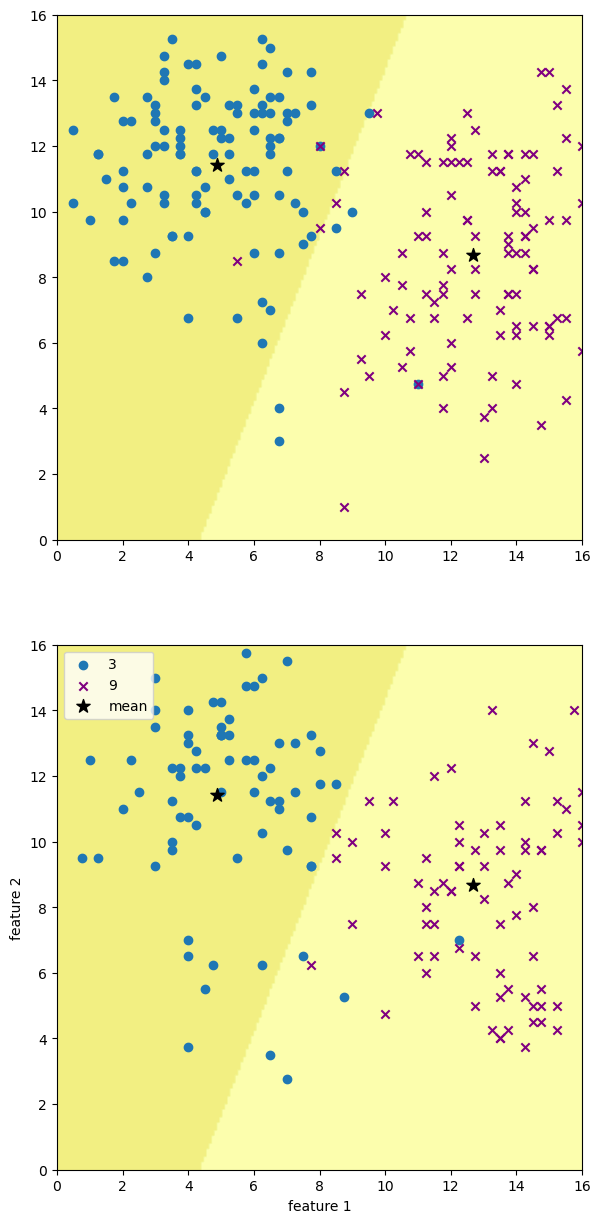

In [91]:
# Aufg 4.3 --------------------------------------------------------------------------------------------------------

def visualization_svm(x_train = [], y_train = [], x_test = [], y_test = [], mean = []):

    fig, axs = plot.subplots(2, figsize=(15, 15))
    
    #Grid
    x_min = [0, 0]
    x_max = [16, 16]
    x_mesh = nm.linspace(x_min[0], x_max[0], 200)
    y_mesh = nm.linspace(x_min[1], x_max[1], 200) 
    Mesh = nm.array(nm.meshgrid(x_mesh, y_mesh)).reshape(2, -1).T
    beta_, b_ = fit_smv(data_2d, training_labels)
    predicted_labels_ = predict_smv(beta_, b_, Mesh)
    axs[0].imshow(nm.flipud((predicted_labels_>0).reshape(-1, 200)), cmap="inferno", alpha=0.9, vmin=-20, extent=(x_min[0], x_max[0], x_min[1], x_max[1]))
    axs[1].imshow(nm.flipud((predicted_labels_>0).reshape(-1, 200)), cmap="inferno", alpha=0.9, vmin=-20, extent=(x_min[0], x_max[0], x_min[1], x_max[1]))




    #Training points
    axs[0].scatter(x_train[y_train == -1, 0], x_train[y_train == -1, 1], marker = "o", label = "3")
    axs[0].scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], c = "purple", marker = "x", label = "9")
    
    #Means
    axs[0].scatter(mean[0][0], mean[0][1], c = "black", marker = "*", s = 100, label = "mean")
    axs[0].scatter(mean[1][0], mean[1][1], c = "black", marker = "*", s = 100)

    #Test points
    axs[1].scatter(x_test[y_test == -1, 0], x_test[y_test == -1, 1], marker = "o", label = "3")
    axs[1].scatter(x_test[y_test == 1, 0], x_test[y_test == 1, 1], c = "purple", marker = "x", label = "9")
    
    #Means
    axs[1].scatter(mean[0][0], mean[0][1], c = "black", marker = "*", s = 100, label = "mean")
    axs[1].scatter(mean[1][0], mean[1][1], c = "black", marker = "*", s = 100)

    #print errors
    #predicted_labels_train = predict_smv(beta_, b_, x_train)
    #print(check_errors_for_labels(predicted_labels_train, y_train))
    #predicted_labels_test = predict_smv(beta_, b_, x_test)
    #print(check_errors_for_labels(predicted_labels_test, y_test))
    
    #Plot
    plot.xlim(x_min[0], x_max[0])
    plot.ylim(x_min[1], x_max[1])
    plot.legend()
    plot.xlabel("feature 1")
    plot.ylabel("feature 2")
    plot.show()



#Visualization
visualization_svm(nm.array(data_2d), nm.array(training_labels), nm.array(data_2d_test), nm.array(test_labels), mu_custom)


